In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import json

In [5]:
def analyze_file(file_path):
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
    quantization = data["quantization"]
    temperature = data["temperature"]
    variance_data = {}
    for batch_size in data["data"]:
        df = pd.DataFrame(data["data"][batch_size])
        # print(df.head)
        mean = df.mean(axis=0)
        variance = df.var(axis=0)
        variance_data[batch_size] = variance
    plot_file(quantization, temperature, variance_data)
def plot_file(quantization, temperature, variance_data):
    plt.figure(figsize=(10, 6))
    
    for token in variance_data[next(iter(variance_data))].index:
        batch_sizes = list(variance_data.keys())
        variances = [variance_data[batch_size][token] for batch_size in batch_sizes]
        plt.plot(batch_sizes, variances, label=f'Token {token}')
    
    plt.xlabel('Batch Size')
    plt.ylabel('Variance')
    plt.title(f'Variance per Token (Quantization: {quantization}, Temperature: {temperature})')
    plt.legend()
    plt.show()

./logs/batch_fp16_2.json


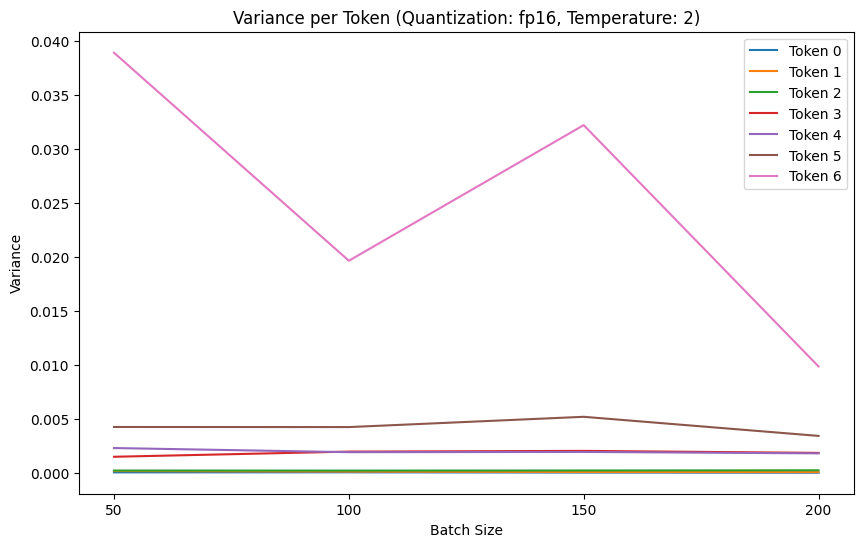

./logs/batch_fp8_2.json


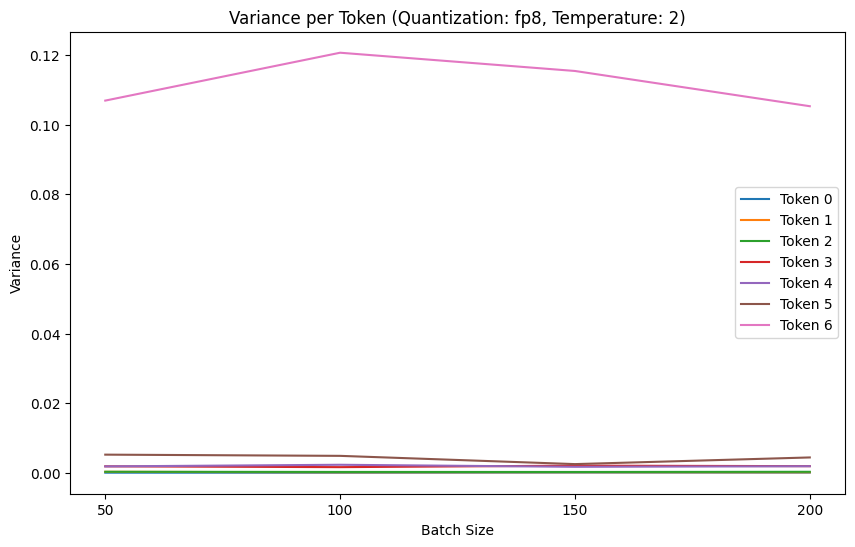

./logs/batch_int4_2.json


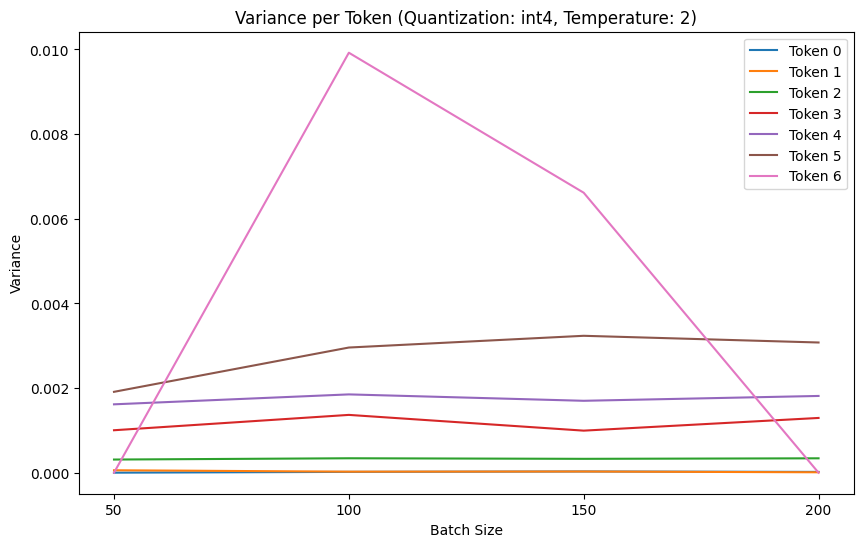

./logs/batch_ood_fp16_2.json


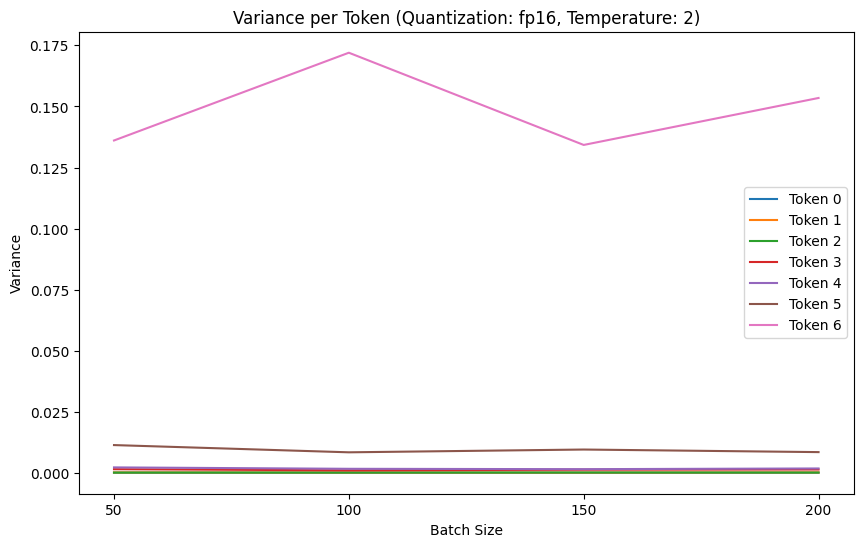

./logs/batch_ood_fp8_2.json


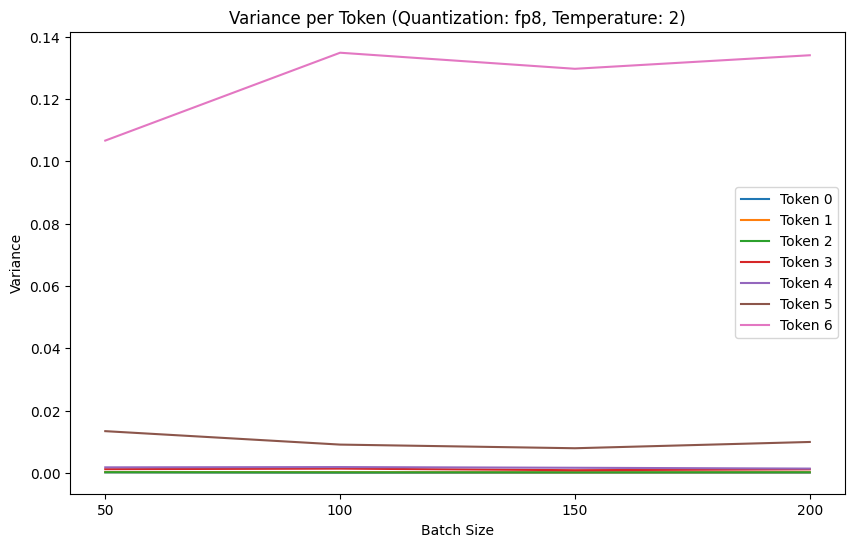

./logs/batch_ood_int4_2.json


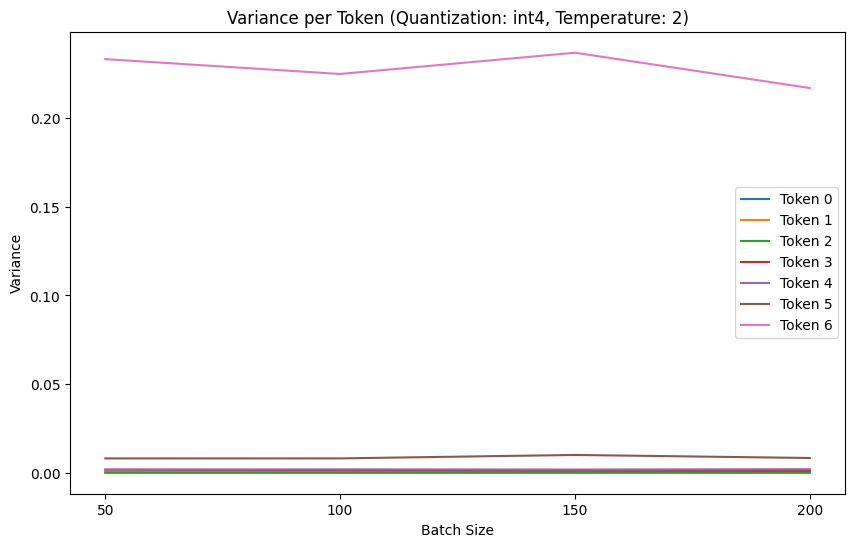

In [6]:
files = [f for f in glob.glob('./logs/**/*', recursive=True) if os.path.isfile(f)]
for file in files:
    print(file)
    analyze_file(file)
    # Plot mean and variance